## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [1]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [4]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import requests
from bs4 import BeautifulSoup
import time
import warnings
warnings.filterwarnings(action='ignore')

titles = []

for i in range(1, 11):
    res = requests.get(f'https://hashcode.co.kr/?page={i}', user_agent)
    soup = BeautifulSoup(res.text, 'html.parser')

    finds = soup.find_all('li', 'question-list-item')
    for title in finds:
        titles.append(title.h4.text.strip())
    time.sleep(0.5)
print(titles[:10])


['scanf_s에서 입력에 자꾸 오류가 나타나는데, 어찌 해결해야 할까요?', 'xgboost 하이퍼파라미터 질문', '정수를 입력받아 짝수의 합과 홀수의 합을 구하는 프로그램', '프로그래머스 vim 입력모드->일반모드 전환하는 방법', '파이썬 프로젝트 중 오류', '구조체 사용하여 다항식의 덧셈 구현하는 문제', 'Fourier transform 된 사진파일의 HPF 코으', '다시 매개변수화되어야 하는 매개변수화된 메서드 작성', '파이썬 간단한 별그리기 질문', 'Java 홀수 혹은 짝수의 합 구하는 프로그램 질문']


In [5]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

In [6]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

hannanum = Hannanum()

words = []

for title in titles:
    nouns = hannanum.nouns(title)
    words += nouns

words[:10]

['scanf_s', '입력', '오류', '해결', '하이퍼파라미터', '질문', '정수', '입력', '짝수', '합']

In [7]:
# counter를 이용해 각 단어의 개수를 세줍니다.

counter = Counter(words)

counter

Counter({'scanf_s': 2,
         '입력': 13,
         '오류': 32,
         '해결': 5,
         '하이퍼파라미터': 1,
         '질문': 110,
         '정수': 2,
         '짝수': 2,
         '합': 5,
         '홀수': 2,
         '프로그램': 12,
         '프로그래머스': 3,
         '입력모드': 1,
         '일반모드': 1,
         '전환': 2,
         '방법': 28,
         '파이썬': 112,
         '프로젝트': 3,
         '중': 17,
         '구조체': 2,
         '사용': 22,
         '다항식': 2,
         '덧셈': 3,
         '구현': 7,
         '문제': 30,
         '사진파일': 1,
         '코으': 1,
         '매개변수화': 2,
         '메서드': 1,
         '작성': 3,
         '한': 6,
         '별그리': 1,
         '언어': 28,
         '마름모': 1,
         '출력': 13,
         '컴퓨터': 1,
         '시간': 6,
         '기준': 2,
         '자동': 3,
         '저': 2,
         '설정': 1,
         '문구': 2,
         '타이핑': 1,
         '수': 21,
         '작동': 4,
         '4종류': 1,
         '강아지': 1,
         '분류': 2,
         '코드': 32,
         '다람쥐': 2,
         '청설모': 1,
         '이미지': 5,
         '파일':

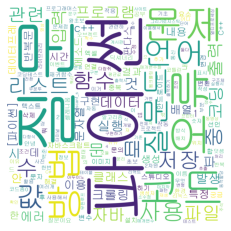

In [8]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

wordcloud = WordCloud(font_path='C:/Windows/Fonts/gulim',
                      background_color='white',
                      width=1000,
                      height=1000
                     )


img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(img)